In [179]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import stats

%matplotlib inline

In [180]:
df = pd.read_csv("../data_raw/london_merged.csv")

In [181]:
df[["date", "time"]] = df["timestamp"].str.split(pat = " ", expand = True)

In [182]:
df = df.drop(["timestamp"], 1)

In [183]:
df = (df.groupby("date")
       .agg({'cnt': 'sum',
             't1': 'mean',
             't2': 'mean',
             'hum': 'mean',
             'wind_speed': 'mean',
             'weather_code': lambda x: scipy.stats.mode(x)[0],
             'is_holiday': 'mean',
             'is_weekend': 'mean',
             'season': 'mean'}))

df["season"] = df["season"].replace([0, 1, 2, 3], ["spring", "summer", "autumn", "winter"])
df["weather_code"] = df["weather_code"].replace([1, 2, 3, 4, 7, 10, 26], ["clear", "few clouds", "partly cloudy", "cloudy", "rain", "thunderstorm", "snow"])

In [184]:
df["is_holiday"] = df["is_holiday"].astype(bool)
df["is_weekend"] = df["is_weekend"].astype(bool)

In [185]:
new_col_names = ["bike_rents", "temp_actual(C)", "temp_feeling(C)", "humidity", "wind_speed", "weather_condition", "holiday(y/n)", "weekend(y/n)", "season"]
df.columns = new_col_names

In [186]:
df = df.round(decimals = 2)

In [193]:
df.to_csv("../data_clean/london_merged_clean.csv")

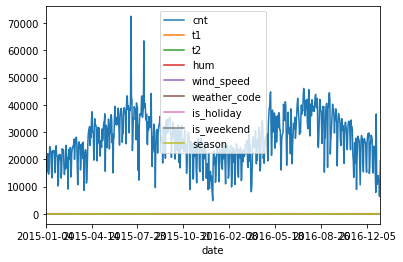

In [188]:
# daily_views = df.groupby(by="timestamp").sum()
# daily_views.plot(); # <-- add ";" to hide printing the object


# df3.plot(x='A', y='B')


df4.plot();

In [189]:
df4["cnt"].max()

72504

In [190]:
df4["cnt"].idxmax()

'2015-07-09'

In [191]:
df4["cnt"].min()

4869

In [192]:
df4["cnt"].idxmin()

'2016-01-03'